<a href="https://colab.research.google.com/github/kladrillono/MLA_KEL/blob/main/MLA1_KEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1**  
**Kendall Ladrillono**  
**CS430-ON**  
**Machine Learning in the Cloud**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Read file.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

Display first 5 rows of dataset.

In [ ]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Display last five rows of dataset.

In [ ]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


Display 5 random rows from the dataset.

In [ ]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
5941,9/4/2012 13:00,25.2,17.8,64,9,24.1,100.89,Cloudy
8347,12/13/2012 19:00,1.7,-2.5,74,15,25.0,101.99,Mainly Clear
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
7079,10/21/2012 23:00,9.3,4.9,74,17,25.0,100.75,Mostly Cloudy
8014,11/29/2012 22:00,-7.3,-14.0,59,17,25.0,102.29,Mostly Cloudy


List all columns of the dataset.

In [ ]:
print(df.columns.tolist())

['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']


Rename columns

In [ ]:
df.rename(columns={'Date/Time':'date_time', 'Temp (C)':'temp_c', 'Dew Point Temp (C)':'dew_point', 'Rel Hum (%)':'relative_humidity', 'Wind Spd (km/h)':'wind_speed', 'Visibility (km)':'visibility', 'Stn Press (kPa)':'pressure', 'Weather':'weather'}, inplace=True)

Getting standard statistics

In [ ]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Create new column temp_f.

In [ ]:
df = df.assign(temp_f = df.temp_c * (9/5)+32)

Rearrange columns

In [ ]:
df = df.reindex(['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather'], axis=1)

In [ ]:
df

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


Code to display data types of all columns.

In [ ]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

Convert date_time column to date data type and confirm.

In [ ]:
df.date_time=pd.to_datetime(df.date_time)

In [ ]:
df.date_time.dtype

dtype('<M8[ns]')

Create series 'monthly_avg' which contains average monthly temperature.

In [ ]:
monthly_avg = df.groupby(df.date_time.dt.month)['temp_f'].mean()

In [ ]:
monthly_avg

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64

Create a scatterplot of temperature vs. relative humidity.

<Axes: title={'center': 'Temperature vs. Relative Humidity'}, xlabel='Temperature (F)', ylabel='Relative Humidity'>

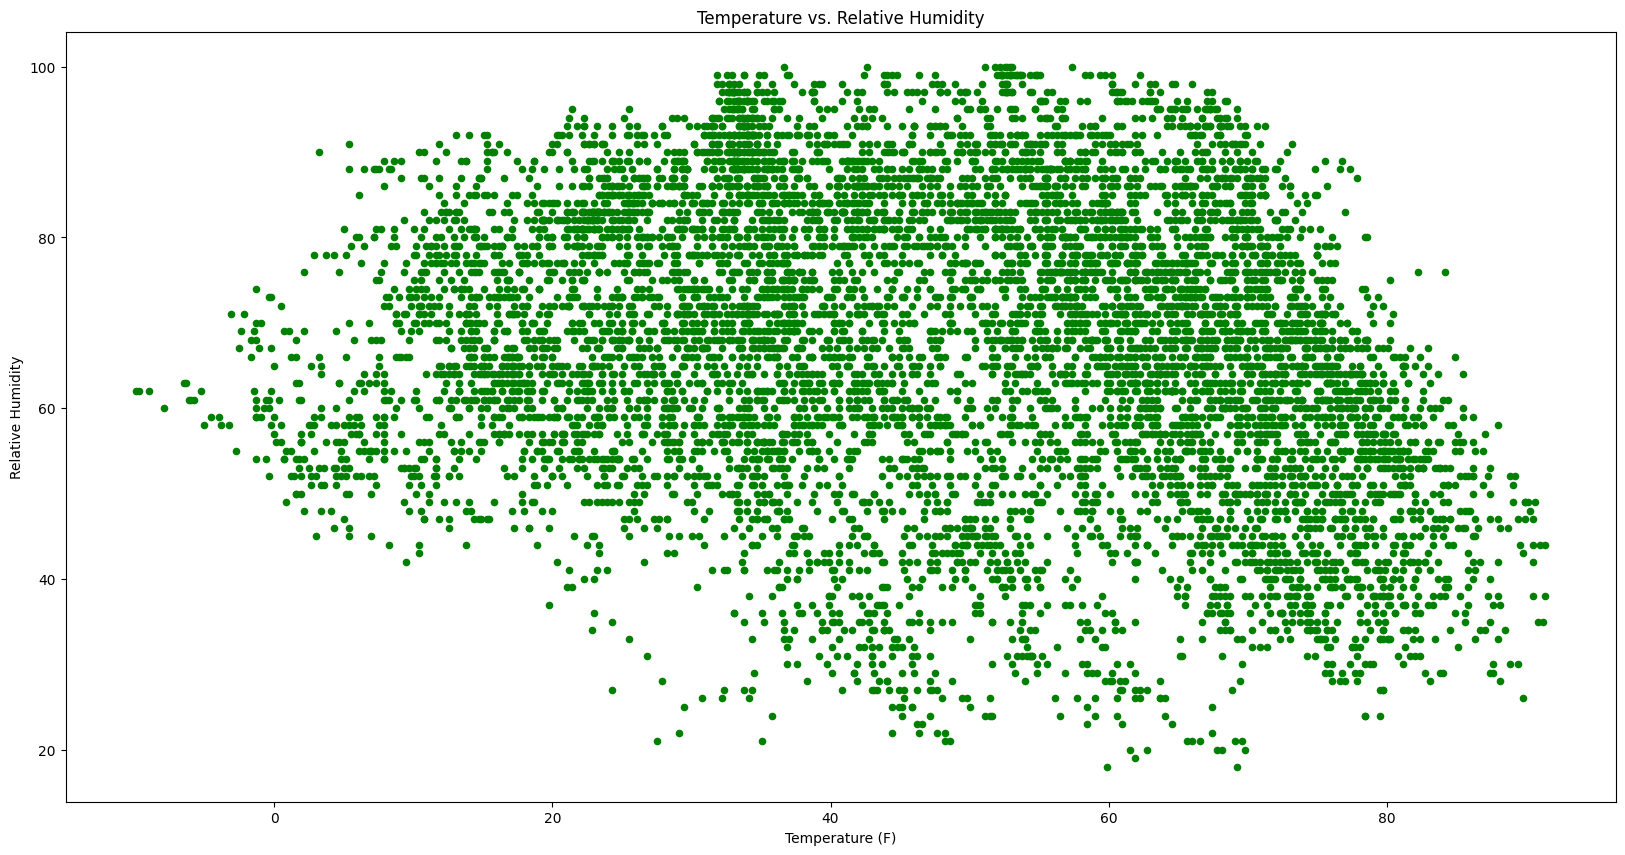

In [ ]:
df.plot(kind='scatter', x='temp_f', xlabel='Temperature (F)', y='relative_humidity', ylabel='Relative Humidity', title='Temperature vs. Relative Humidity', c='green', figsize=(20,10))

In [ ]:
monthly_avg

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64

Create a line chart of average temperature per month.

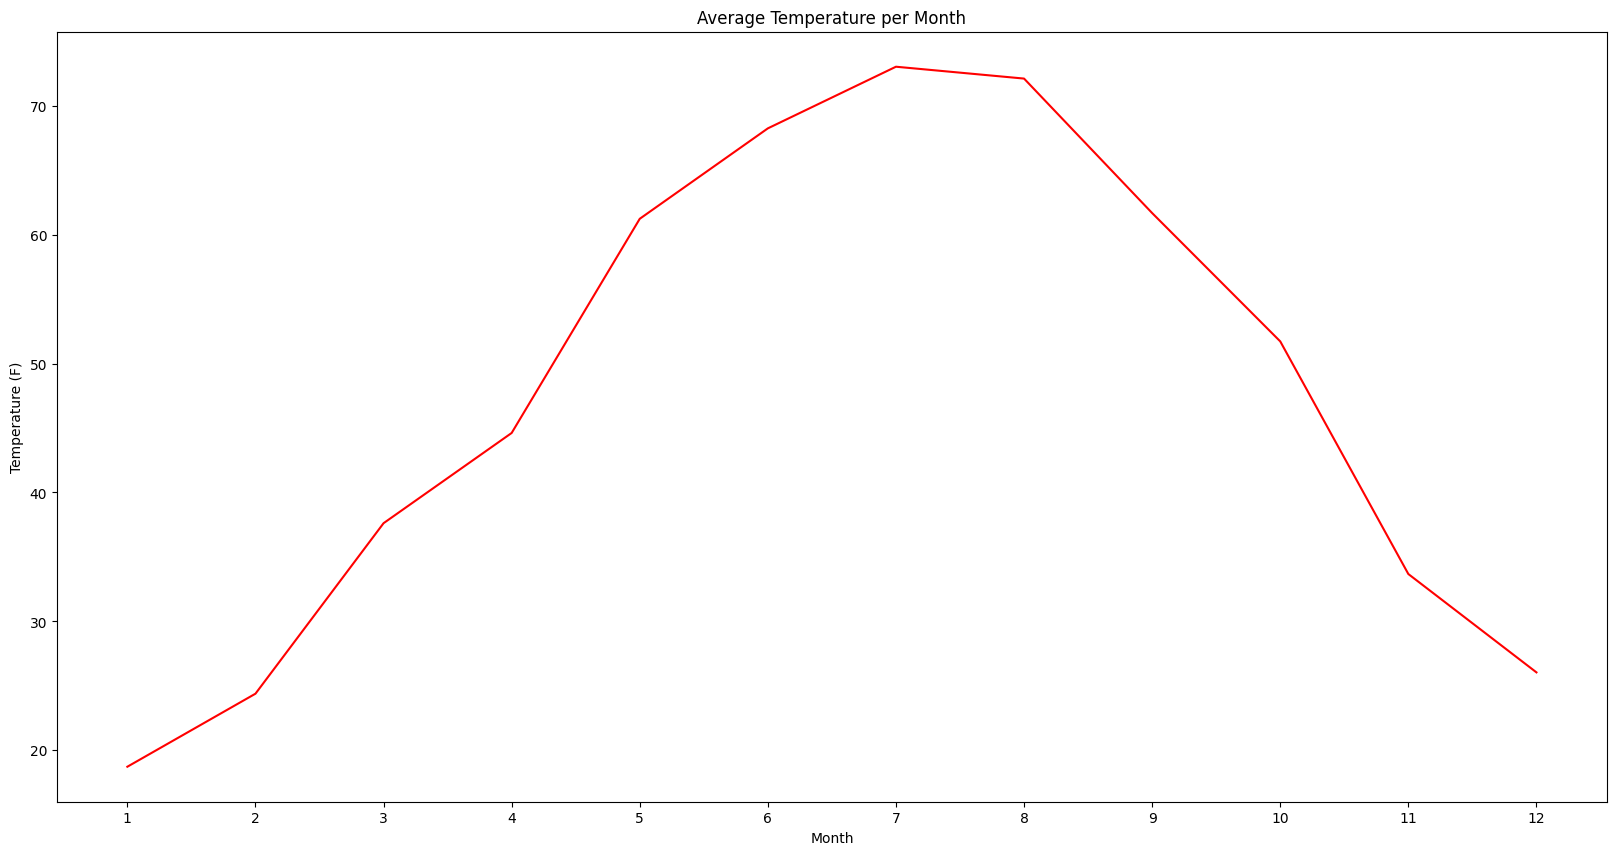

In [ ]:
index = [1,2,3,4,5,6,7,8,9,10,11,12]
fig = plt.figure(figsize=(20,10))
plt.plot(index, monthly_avg, color='red')
plt.xticks(index)
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')

plt.show()

Create a box plot.

<Axes: >

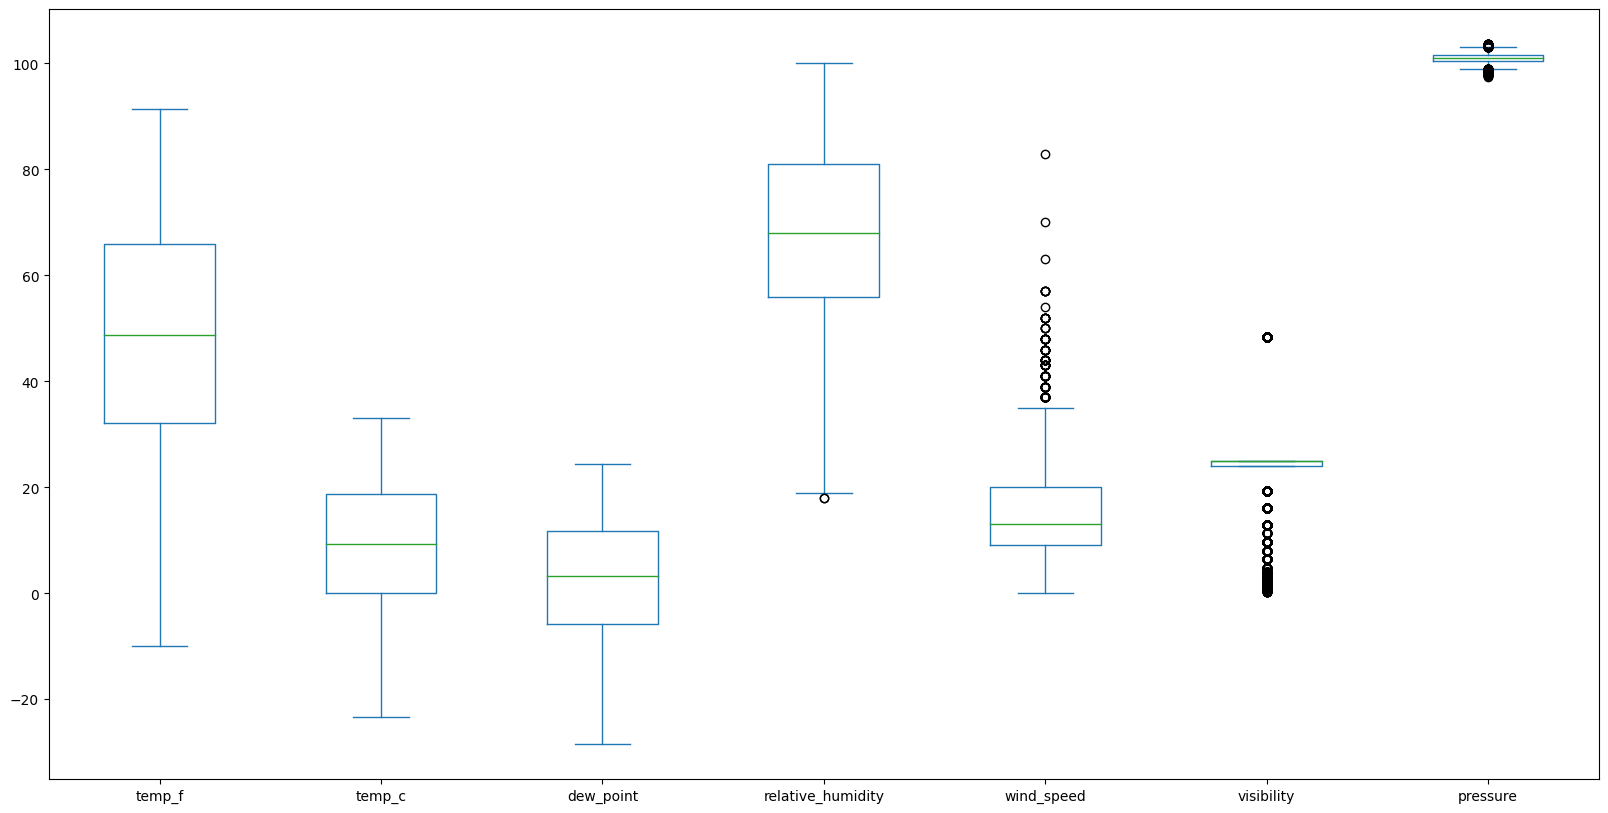

In [ ]:
df.plot(kind='box', figsize=(20,10))